In [1]:
import nptdms as tdms
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os
import time

# DEMO

In [16]:
dir_temp = "./temperature_csv/" 
dir_volt = "./voltage_current_csv/" 
prefix_temp = "Temperature-"
prefix_volt = "Voltage-Current-"
time_str = "2019-12-09T17-58-55"
suffix = ".csv"
dir_save = "./temperature_voltage_current_csv/"


file_temp = dir_temp+prefix_temp+time_str+suffix
file_volt = dir_volt+prefix_volt+time_str+suffix
file_save = dir_save+time_str+suffix
print(file_volt)
volt_df = pd.read_csv(file_volt)
temp_df = pd.read_csv(file_temp)
print(volt_df.shape)
      
volt_df.head()

./voltage_current_csv/Voltage-Current-2019-12-09T17-58-55.csv
(169626, 10)


,Ic,U_IGBT3_1,U_IGBT3_2,Uce,t,Tbase_Cu,Tsink_IGBT3_2,Tsink_IGBT3_1,Tj_IGBT3_2,Tj_IGBT3_1
0,1.486293,-0.000010,-0.000152,0.180551,1.575886e+09,19.440044,19.757067,19.791712,20.755072,22.420507
1,1.497596,-0.000020,-0.000249,0.193276,NaN,NaN,NaN,NaN,NaN,NaN
2,1.487375,0.000107,-0.000134,0.181602,NaN,NaN,NaN,NaN,NaN,NaN
3,1.497762,0.000084,-0.000199,0.193010,NaN,NaN,NaN,NaN,NaN,NaN
4,1.486117,-0.000029,-0.000216,0.180234,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(temp_df.shape)
temp_df.head()

(33255, 10)


,Tbase_Cu,Tsink_IGBT3_2,Tsink_IGBT3_1,Tj_IGBT3_2,Tj_IGBT3_1,t,Ic,U_IGBT3_1,U_IGBT3_2,Uce
0,19.445368,19.440151,19.409977,19.450211,19.476601,1.575886e+09,NaN,NaN,NaN,NaN
1,19.437788,19.438162,19.413946,19.443377,19.474195,1.575886e+09,NaN,NaN,NaN,NaN
2,19.440044,19.757067,19.791712,20.755072,22.420507,1.575886e+09,1.486293,-0.00001,-0.000152,0.180551
3,19.449648,20.557920,20.696129,22.514402,24.940254,1.575886e+09,NaN,NaN,NaN,NaN
4,19.449648,20.557920,20.696129,22.514402,24.940254,1.575886e+09,NaN,NaN,NaN,NaN


In [62]:
select_df = volt_df.dropna(inplace = False)
l = select_df["Tj_IGBT3_1"].values
l[1:-1] = (l[:-2]+l[1:-1]+l[2:])/3
m = l[1:]-l[:-1]> 0
m = m.astype(np.int8)
n = m[1:]-m[:-1]
print(m)
print(n)


[1 1 1 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [64]:
print(l[0:50].astype(np.int8))
print(m[0:50])
print(n[0:50])
print(n[-50:])

[22 27 30 32 33 35 36 37 38 40 40 41 42 45 47 50 53 55 58 60 58 54 49 46
 45 44 44 43 42 42 42 47 53 59 61 63 65 67 68 70 72 68 63 57 55 54 53 52
 52 51]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0]
[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1]


In [63]:
n = np.insert(n,0,values = 1)
n = np.append(n,values = 1)
Tmax = np.where(n==-1)
Tmin = np.where(n==1)

In [65]:
print(n.shape)
print(l.shape)

(3570,)
(3570,)


In [67]:
print(Tmin[0].shape)
Tmax[0].shape

(99,)


(98,)

In [53]:
ind = select_df.index.values
ind.shape

(3570,)

In [54]:
Tmin

(array([   0,   11,   30,   51,   71,   92,  109,  130,  161,  191,  222,
         252,  292,  327,  360,  401,  441,  479,  516,  553,  589,  624,
         658,  693,  728,  763,  798,  833,  868,  902,  937,  972, 1007,
        1041, 1076, 1111, 1146, 1180, 1215, 1250, 1284, 1319, 1358, 1399,
        1452, 1467, 1505, 1516, 1569, 1573, 1579, 1634, 1638, 1658, 1664,
        1703, 1711, 1717, 1723, 1729, 1768, 1770, 1776, 1782, 1786, 1791,
        1828, 1830, 1842, 1881, 1890, 1935, 1973, 2012, 2048, 2083, 2118,
        2152, 2187, 2222, 2256, 2291, 2325, 2360, 2395, 2429, 2464, 2498,
        2533, 2567, 2602, 2637, 2672, 2706, 2741, 2775, 2810, 2844, 2878,
        2913, 2948, 2982, 3017, 3051, 3086, 3120, 3155, 3189, 3224, 3259,
        3293, 3327, 3362, 3396, 3431, 3465, 3500, 3534, 3569], dtype=int64),)

In [55]:
ind

array([     0,     51,    102, ..., 169473, 169524, 169575], dtype=int64)

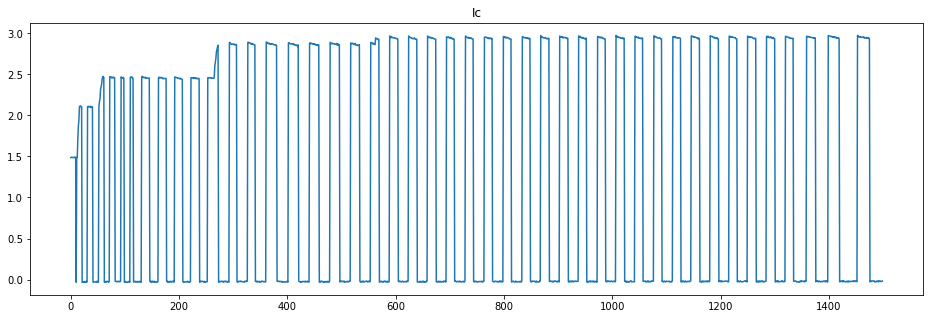

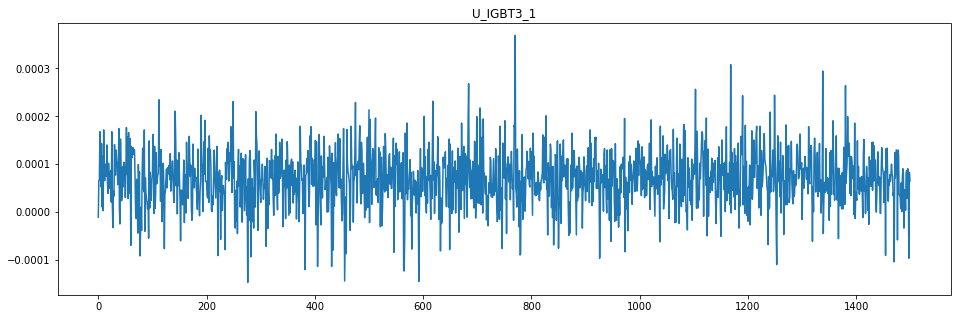

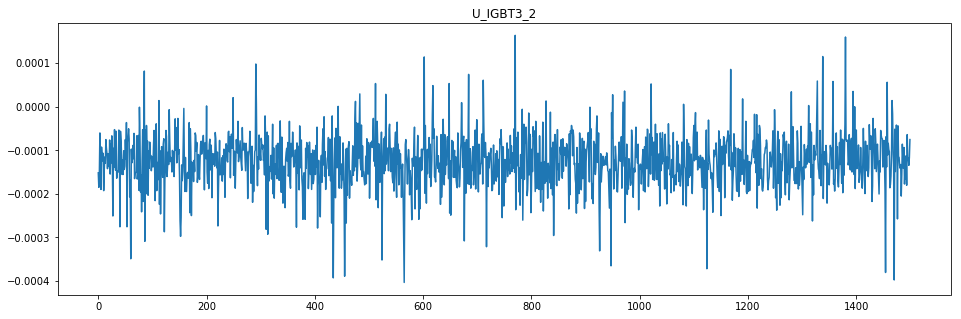

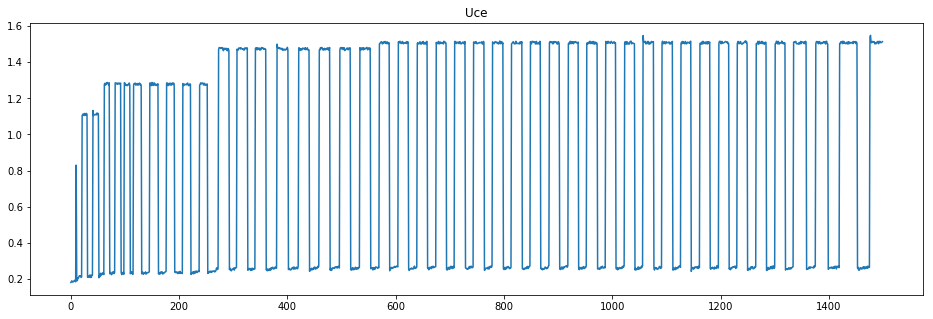

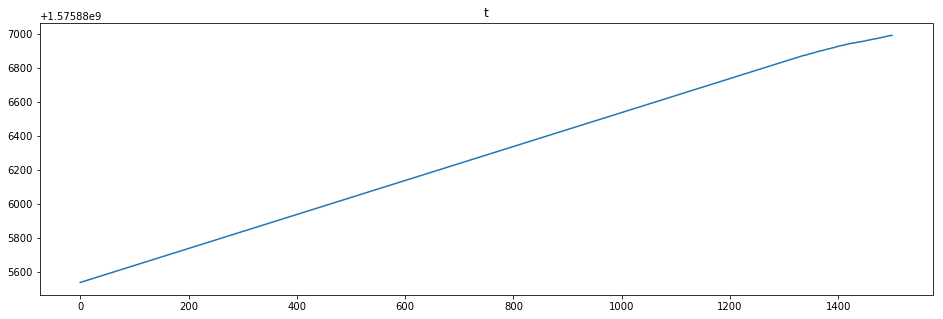

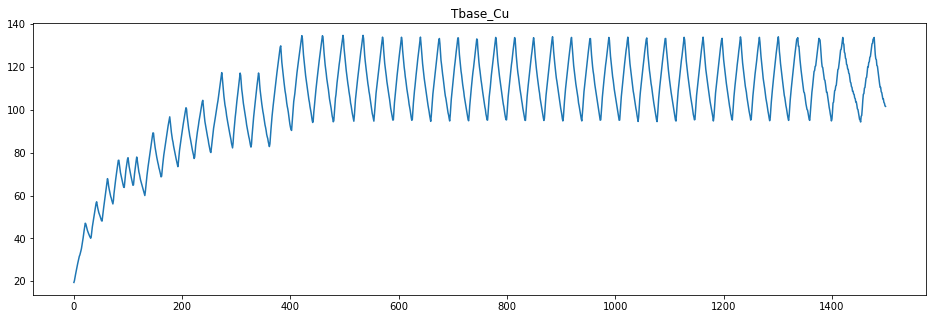

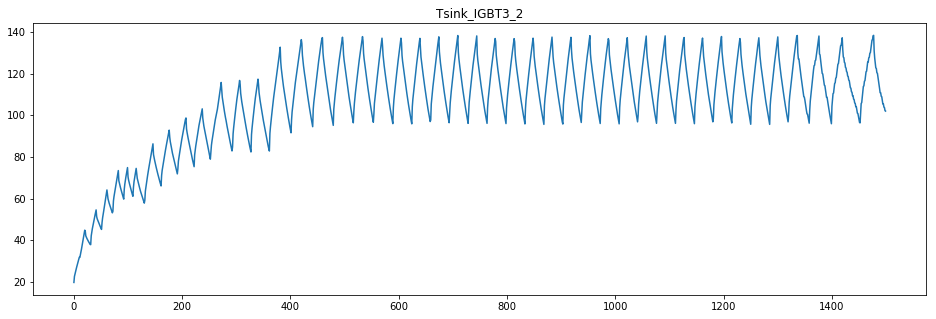

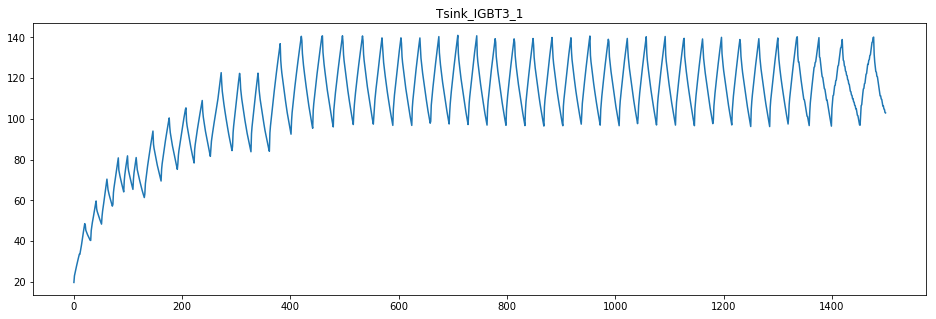

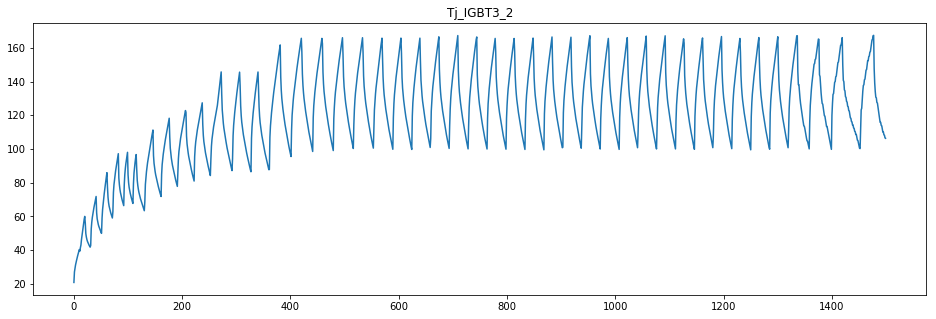

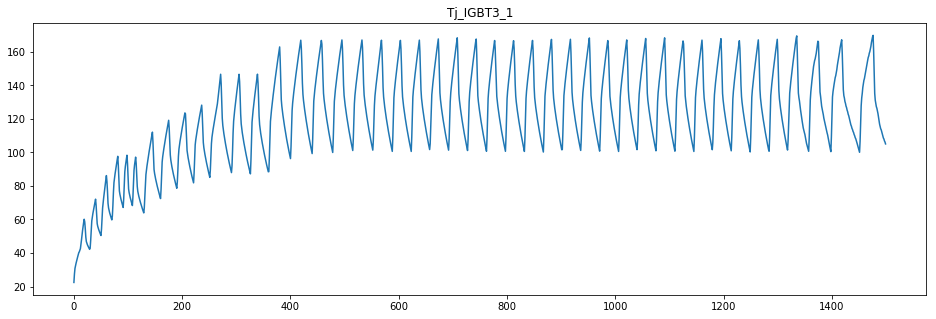

In [69]:
for t in select_df.columns:
    plt.figure(figsize=(16,5))
    plt.plot(select_df[t].values[0:1500])
    plt.title(t)
    plt.show()

In [71]:
dir_temp = "./temperature_csv/" 
dir_volt = "./voltage_current_csv/" 
prefix_temp = "Temperature-"
prefix_volt = "Voltage-Current-"
time_str = "2019-12-09T17-58-55"
suffix = ".csv"
dir_save = "./temperature_voltage_current_csv/"


file_temp = dir_temp+prefix_temp+time_str+suffix
file_volt = dir_volt+prefix_volt+time_str+suffix
file_save = dir_save+time_str+suffix
print(file_volt)
volt_df = pd.read_csv(file_volt)
temp_df = pd.read_csv(file_temp)

select_df = volt_df.dropna(inplace = False)
l = select_df["Tj_IGBT3_1"].values
l[1:-1] = (l[:-2]+l[1:-1]+l[2:])/3
ix = select_df.index.values
m = l[1:]-l[:-1]> 0
m = m.astype(np.int8)
n = m[1:]-m[:-1]
n = np.insert(n,0,values = 1)
n = np.append(n,values = 1)
i_Tmax = np.where(n==-1)[0]
i_Tmin = np.where(n==1)[0]

n_round = 0
for i in range(len(i_Tmax)):
    n_round += 1
    dur = i_Tmin[i+1]-i_Tmin[i]
    Tmax = l[i_Tmax[i]]
    Tmin1 = l[i_Tmin[i]]
    Tmin2 = l[i_Tmin[i+1]]
#     print(n_round,dur,Tmax,Tmin1,Tmin2)
    df = volt_df.loc[ix[i_Tmin[i]]:ix[i_Tmin[i+1]],:]
    df.to_csv("./round_cut_csv/"+str(n_round)+"-"+str(dur)+"-"+str(int(Tmin1))+"-"+str(int(Tmax))+"-"+str(int(Tmin2))+".csv")
    
    
    


./voltage_current_csv/Voltage-Current-2019-12-09T17-58-55.csv


# cut into round
## cut volt

In [76]:
dir_volt = "./voltage_current_csv/" 
prefix_volt = "Voltage-Current-"
time_str = "2019-12-09T17-58-55"
suffix = ".csv"

n_round = 0
for (_,_,files) in os.walk(dir_volt):
    for file in files:
        time_str = file[-23:-4]
        try:
            # read file
            file_volt = dir_volt+prefix_volt+time_str+suffix
            volt_df = pd.read_csv(file_volt)
            # get index of max T and min T
            select_df = volt_df.dropna(inplace = False)
            l = select_df["Tj_IGBT3_1"].values
            l[1:-1] = (l[:-2]+l[1:-1]+l[2:])/3
            ix = select_df.index.values  # index of temp
            m = l[1:]-l[:-1]> 0
            m = m.astype(np.int8)
            n = m[1:]-m[:-1]
            n = np.insert(n,0,values = 1)
            n = np.append(n,values = 1)  # 1 0 0 0 -1 0 0 1 0 0 -1 0 0 1 //the same size as ix
            i_Tmax = np.where(n==-1)[0]  # 
            i_Tmin = np.where(n==1)[0]

            # cut and save
            for i in range(len(i_Tmax)):
                n_round += 1
                dur = i_Tmin[i+1]-i_Tmin[i]
                Tmax = l[i_Tmax[i]]
                Tmin1 = l[i_Tmin[i]]
                Tmin2 = l[i_Tmin[i+1]]
            #     print(n_round,dur,Tmax,Tmin1,Tmin2)
                df = volt_df.loc[ix[i_Tmin[i]+1]:ix[i_Tmin[i+1]],:]
                df.to_csv("./round_cut_csv/"+str(n_round)+"-"+str(dur)+"-"+str(int(Tmin1))+"-"+str(int(Tmax))+"-"+str(int(Tmin2))+".csv",index = False)
        except:
            print(time_str)



## cut temperature

In [77]:
dir_temp = "./temperature_csv/" 
prefix_temp = "Temperature-"
# time_str = "2019-12-09T17-58-55"
suffix = ".csv"

n_round = 0
for (_,_,files) in os.walk(dir_volt):
    for file in files:
        time_str = file[-23:-4]
        try:
            # read file
            file_volt = dir_temp+prefix_temp+time_str+suffix
            volt_df = pd.read_csv(file_volt)
            # get index of max T and min T
#             select_df = volt_df.dropna(inplace = False)
            l = volt_df["Tj_IGBT3_1"].values
            l[1:-1] = (l[:-2]+l[1:-1]+l[2:])/3
            ix = volt_df.index.values
            m = l[1:]-l[:-1]> 0
            m = m.astype(np.int8)
            n = m[1:]-m[:-1]
            n = np.insert(n,0,values = 1)
            n = np.append(n,values = 1)
            i_Tmax = np.where(n==-1)[0]
            i_Tmin = np.where(n==1)[0]

            # cut and save
            for i in range(len(i_Tmax)):
                n_round += 1
                dur = (i_Tmin[i+1]-i_Tmin[i])/10
                Tmax = l[i_Tmax[i]]
                Tmin1 = l[i_Tmin[i]]
                Tmin2 = l[i_Tmin[i+1]]
            #     print(n_round,dur,Tmax,Tmin1,Tmin2)
                df = volt_df.loc[ix[i_Tmin[i]+1]:ix[i_Tmin[i+1]],:]
                df.to_csv("./temperature_round/"+str(n_round)+"-"+str(int(dur))+"-"+str(int(Tmin1))+"-"+str(int(Tmax))+"-"+str(int(Tmin2))+".csv",index = False)
        except:
            print(time_str)

